In [3]:
import numpy as np
from apportion import largest_remainder
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

[1.         1.04081633 1.08163265 1.12244898 1.16326531 1.20408163
 1.24489796 1.28571429 1.32653061 1.36734694 1.40816327 1.44897959
 1.48979592 1.53061224 1.57142857 1.6122449  1.65306122 1.69387755
 1.73469388 1.7755102  1.81632653 1.85714286 1.89795918 1.93877551
 1.97959184 2.02040816 2.06122449 2.10204082 2.14285714 2.18367347
 2.2244898  2.26530612 2.30612245 2.34693878 2.3877551  2.42857143
 2.46938776 2.51020408 2.55102041 2.59183673 2.63265306 2.67346939
 2.71428571 2.75510204 2.79591837 2.83673469 2.87755102 2.91836735
 2.95918367 3.        ] [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.795

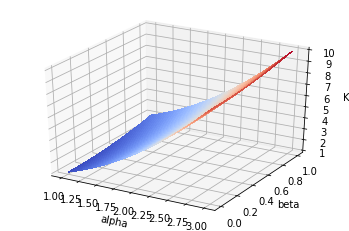

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d', zlabel='KL', xlabel='alpha', ylabel='beta')

x = np.linspace(1, 3)
y = np.linspace(0, 1)
print(x,y)
x, y=np.meshgrid(x,y)
z = (x**2 + y**2)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



In [21]:
%load_ext autoreload
%autoreload 2


import numpy as np
import pipeline
import logging
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

n_tests = 15
steps = 10
m = 20
n = 10000
seats = 100
electoral_threshold = 0.05
# poll_covid = 0.01
political_spectrum = np.array([10, 9, 11, 8, 12, 7, 13, 6, 14, 5, 15, 4, 16, 3, 17, 2, 18, 1, 19, 0])
# (gammas, betas), results = pipeline.test_gamma_beta(electoral_threshold, m, n, n_tests, political_spectrum, seats)
(gammas, betas), results2 = pipeline.test_gamma_beta_parallel(electoral_threshold, m, n, n_tests, political_spectrum, seats, steps)


[(0, 0.0001, 0, 0.0), (0, 0.0002782559402207126, 1, 0.0), (0, 0.000774263682681127, 2, 0.0), (0, 0.002154434690031882, 3, 0.0), (0, 0.005994842503189409, 4, 0.0), (0, 0.016681005372000592, 5, 0.0), (0, 0.046415888336127774, 6, 0.0), (0, 0.12915496650148828, 7, 0.0), (0, 0.3593813663804626, 8, 0.0), (0, 1.0, 9, 0.0), (1, 0.0001, 0, 0.1111111111111111), (1, 0.0002782559402207126, 1, 0.1111111111111111), (1, 0.000774263682681127, 2, 0.1111111111111111), (1, 0.002154434690031882, 3, 0.1111111111111111), (1, 0.005994842503189409, 4, 0.1111111111111111), (1, 0.016681005372000592, 5, 0.1111111111111111), (1, 0.046415888336127774, 6, 0.1111111111111111), (1, 0.12915496650148828, 7, 0.1111111111111111), (1, 0.3593813663804626, 8, 0.1111111111111111), (1, 1.0, 9, 0.1111111111111111), (2, 0.0001, 0, 0.2222222222222222), (2, 0.0002782559402207126, 1, 0.2222222222222222), (2, 0.000774263682681127, 2, 0.2222222222222222), (2, 0.002154434690031882, 3, 0.2222222222222222), (2, 0.005994842503189409, 4,

2020-05-29 01:58:04 INFO     (1,2): g 0.0008; b 0.1111; kl-sntv_liars: 1.1537
2020-05-29 01:58:05 INFO     (0,0): g 0.0001; b 0.0000; kl-sntv_liars: 1.1457
2020-05-29 01:58:05 INFO     (0,8): g 0.3594; b 0.0000; kl-sntv_liars: 1.1457
2020-05-29 01:58:05 INFO     (0,4): g 0.0060; b 0.0000; kl-sntv_liars: 1.1457
2020-05-29 01:58:05 INFO     (1,6): g 0.0464; b 0.1111; kl-sntv_liars: 1.1457
2020-05-29 01:58:06 INFO     (2,8): g 0.3594; b 0.2222; kl-sntv_liars: 1.1457
2020-05-29 01:58:06 INFO     (2,4): g 0.0060; b 0.2222; kl-sntv_liars: 1.1537
2020-05-29 01:58:10 INFO     (2,0): g 0.0001; b 0.2222; kl-sntv_liars: 1.4593
2020-05-29 01:59:04 INFO     (1,3): g 0.0022; b 0.1111; kl-sntv_liars: 1.1673
2020-05-29 01:59:05 INFO     (0,1): g 0.0003; b 0.0000; kl-sntv_liars: 1.1465
2020-05-29 01:59:06 INFO     (0,5): g 0.0167; b 0.0000; kl-sntv_liars: 1.1465
2020-05-29 01:59:07 INFO     (1,7): g 0.1292; b 0.1111; kl-sntv_liars: 1.1465
2020-05-29 01:59:08 INFO     (0,9): g 1.0000; b 0.0000; kl-sntv_

In [4]:
gammas

array([[1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00],
       [1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
        1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.

<IPython.core.display.Javascript object>


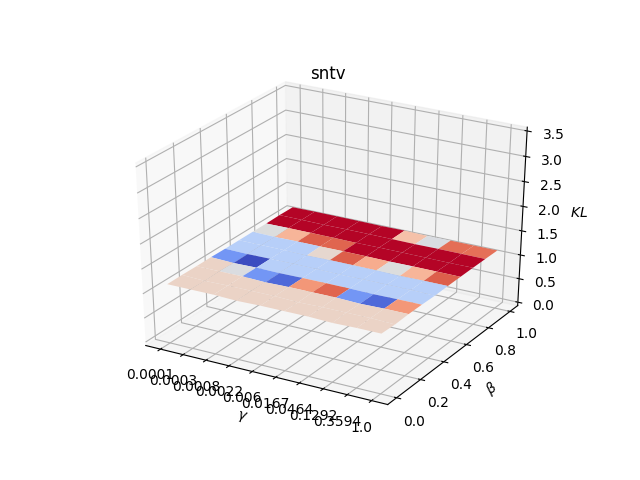

In [23]:
%matplotlib notebook
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d', zlabel='$KL$', xlabel='$\gamma$', ylabel=r'$\beta$', title="sntv", zlim=(0, 3.5))
temp = np.log10(gammas)[0,:]

ax.set_xticks(temp) 
ax.set_xticklabels(np.around(gammas[0,:], decimals=4))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


surf = ax.plot_surface(np.around(temp, decimals=4), betas, results2['sntv'], cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, label='sntv')

In [5]:
t = np.load('gamma-beta.npz')
betas = t['beta']
gammas = t['gamma']
results = {'sntv-l': t['sntvl']}

<IPython.core.display.Javascript object>


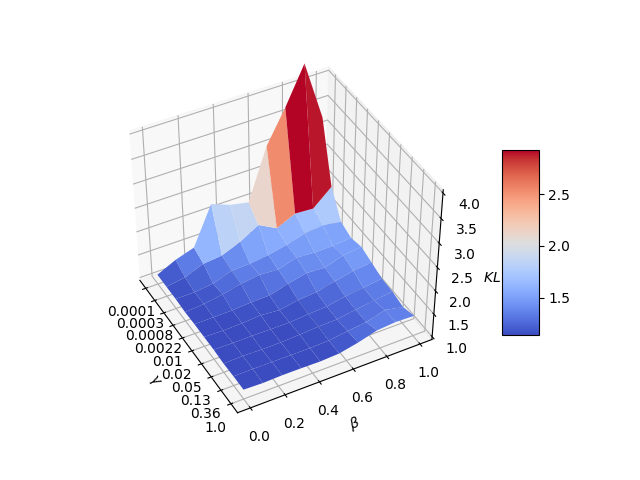

In [30]:
%matplotlib notebook
fig = plt.figure()


ax = fig.gca(projection='3d', zlabel='$KL$', xlabel='$\gamma$', ylabel='$\\beta$', zlim=(1, 4))
temp = np.log10(gammas)[0,:]
ax.set_xticks(temp)
alt_gamma = np.where(gammas[0,:]<0.004, np.around(gammas[0,:], decimals=4), np.around(gammas[0,:], decimals=2))
ax.set_xticklabels(alt_gamma)
surf = ax.plot_surface(temp, betas, results2['sntv-l'], cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, label='sntv-l')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [31]:
fig.savefig('ag-sntv-liars.pdf')

In [7]:
# %matplotlib notebook

# fig = plt.figure()
# ax = fig.gca(projection='3d', zlabel='$KL$', xlabel='$\gamma$', ylabel='$\\beta$', title="sntv liars")
# temp = np.log10(gammas)[0,:]
# ax.set_xticks(temp) 
# ax.set_xticklabels(gammas[0,:])
# surf = ax.plot_surface(temo, gammas, (gammas+2)*betas, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=True, label='sntv-l')


<IPython.core.display.Javascript object>


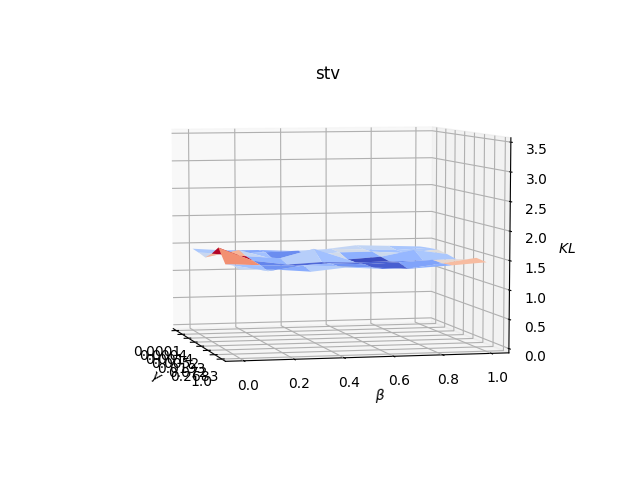

In [20]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d', zlabel='$KL$', xlabel=r'$\gamma$', ylabel=r'$\beta$', title="stv", zlim=(0, 3.5))
temp = np.log10(gammas)[0,:]
ax.set_xticks(temp) 
ax.set_xticklabels(np.around(gammas[0,:], decimals=4))

surf = ax.plot_surface(temp, betas, results2['stv'] ,cmap=cm.coolwarm,
                       linewidth=1, antialiased=True, label='stv')

In [22]:
np.savez('gamma-beta2.npz', gamma=gammas, beta=betas, stv=results2['stv'], sntv=results2['sntv'], sntvl=results2['sntv-l'])

In [19]:
results2['stv'].std()

0.05314003175614458